## DATA SCIENCE ASSIGNMENT
Name - Mohit Singh

URN - 6831420

e-mail - ms04010@surrey.ac.uk


The dataset focuses on E. coli proteins with 5 features, sourced from UC Irvine, aiming to predict protein location (0 for inner membrane, 1 for perisplasm). Each row in the SurreyLearn CSV file represents a protein, with columns X1 to X5 as features and C as the location class.

## imported libraries:
- <b>NumPy</b> (import numpy as np): An essential Python library designed for performing numerical operations, it facilitates the handling of extensive, multi-dimensional arrays and matrices. Additionally, it offers a suite of mathematical functions tailored for manipulating these arrays.

- **Pandas** (import pandas as pd): A robust library specializing in data manipulation and analysis within Python. It introduces efficient data structures such as DataFrame, enabling streamlined handling and manipulation of data.

- **Matplotlib** (import matplotlib.pyplot as plt): A versatile 2D plotting library for generating static, animated, and interactive visualizations in the Python programming language.

- **Seaborn** A statistical data visualization library constructed on top of Matplotlib (import seaborn as sns). It offers an intuitive user interface for making eye-catching and educational statistical visuals.

- **Scikit-learn** (from sklearn): A machine learning library that simplifies and enhances the data analysis and modeling process in Python. It encompasses a diverse set of algorithms, including those for classification, regression, clustering, and more.

- **MinMaxScaler** (from sklearn.preprocessing import MinMaxScaler): A specific scaler from Scikit-learn used for scaling numerical features to a specified range (typically between 0 and 1).

- **train_test_split** A Scikit-learn utility for dividing datasets into training and testing sets is (from sklearn.model_selection import train_test_split).

- **GaussianNB** (from sklearn.naive_bayes import GaussianNB): A Scikit-learn class that uses the Bayes theorem to create a basic probabilistic classifier, the Gaussian Naive Bayes method.

- **Logistic Regression** A Scikit-learn class that implements logistic regression, a linear model used for binary and multiclass classification issues (from sklearn.linear_model import LogisticRegression).

- **Confusion Matrix** (from sklearn.metrics import confusion_matrix): A Scikit-learn function that summarizes the numbers of true positive, true negative, false positive, and false negative predictions is used to assess how well a classification algorithm performs.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import the dataset 
The project starts by loading the dataset (ecoli.csv) into a Pandas DataFrame for further analysis.

In [2]:
dataframe = pd.read_csv('ecoli.csv')
data_copy = dataframe # Data Backup
dataframe

,X1,X2,X3,X4,X5,C
0,-0.007564,0.222171,0.158978,1.159728,0.267387,0
1,0.171858,-0.041690,0.250635,0.165851,0.461043,0
2,0.736046,0.343963,0.749114,0.561858,0.712554,0
3,0.000639,-0.175082,0.070584,0.317284,0.582597,0
4,0.571760,-0.244216,0.234515,0.902095,0.594026,0
...,...,...,...,...,...,...
124,0.648946,0.946382,0.893618,0.539939,0.532365,1
125,0.768015,0.955685,0.495043,0.100583,0.836665,1
126,0.649908,0.845137,0.406619,0.654427,1.003261,1
127,0.221111,0.787071,0.318218,0.867372,0.682562,1


## summary of data
A general summary of the dataset is provided, including basic statistics and information about the features.

In [3]:
# Display basic statistics and information about the dataset

# Print the summary statistics
statistics_summary = dataframe.describe()
print("Statistics summary:")
print(statistics_summary)


# Print information about the dataset
info = dataframe.info()
print("\nInformation about the Dataset:")
print(info)

Statistics summary:
               X1          X2          X3          X4          X5           C
count  129.000000  129.000000  129.000000  129.000000  129.000000  129.000000
mean     0.539102    0.597149    0.521040    0.686822    0.565779    0.403101
std      0.478155    0.433768    0.378367    0.438045    0.412171    0.492433
min     -0.430791   -0.281866   -0.263064   -0.600203   -0.484916    0.000000
25%      0.180917    0.284631    0.250635    0.416989    0.267387    0.000000
50%      0.559401    0.535186    0.495043    0.716888    0.568919    0.000000
75%      0.826496    0.864219    0.793372    0.962953    0.836665    1.000000
max      2.044694    1.711213    1.486272    1.743930    1.848438    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      129 non-null    float64
 1   X2      129 non-null    float64
 2   X3      129 non-null 

## Checking Missing Values 
Checking and addressing any missing values in the dataset.

In [4]:
# Check for missing values in the dataset
missing_value = dataframe.isnull().sum()

# Output the number of null or missing values present in each column.
print("Missing Values:")
print(missing_value)


Missing Values:
X1    0
X2    0
X3    0
X4    0
X5    0
C     0
dtype: int64


## Correlation Analysis
Analyzing the correlation between each feature and the target variable (C) to understand their relationship

In [5]:
# Calculate the correlation matrix.
correlationmatrix = dataframe.corr()

# Print the matrix
print("Correlation Matrix:")
print(correlationmatrix)


Correlation Matrix:
          X1        X2        X3        X4        X5         C
X1  1.000000  0.088768  0.075019 -0.042973 -0.078337  0.237523
X2  0.088768  1.000000  0.032293 -0.094101 -0.145810  0.345237
X3  0.075019  0.032293  1.000000 -0.005492 -0.014480 -0.068347
X4 -0.042973 -0.094101 -0.005492  1.000000 -0.051284 -0.310577
X5 -0.078337 -0.145810 -0.014480 -0.051284  1.000000 -0.326354
C   0.237523  0.345237 -0.068347 -0.310577 -0.326354  1.000000


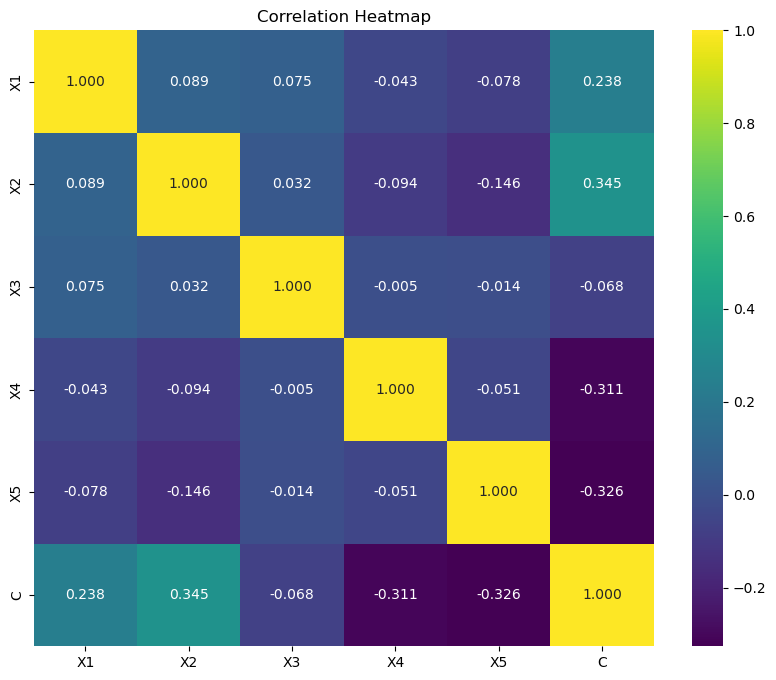

In [6]:
# Create a heatmap for better understanding 

plt.figure(figsize=(10, 8))
sns.heatmap(correlationmatrix, annot=True, cmap='viridis', fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

## Class Distribution
- Investigating the distribution of classes in the target variable.

In [7]:
class_distribution = dataframe['C'].value_counts()


## data scaling 
Data scaling is the  process by which we transform the values ​​in our dataset to fit within a certain range, in this case between 0 and 1. The purpose of this transformation is to make it easier for the machine learning model to learn and find patterns in the data more efficiently.

### Min-Max scaler is employed for scaling. 
Here's a breakdown of how it works:

- The Min-Max scaler uses the minimum and maximum values present in the dataset.
- For each data point, it calculates the difference between the data point and the minimum value in the column. 
- The result is that the scaled values are proportionally adjusted, ensuring they fall within the range [0, 1].
- Before scaling, it's essential to separate the dataset into features (X) and target values (y), commonly denoted as input (features) and output (target)

In [8]:
y = dataframe['C']
x = dataframe[dataframe.columns[:-1]]

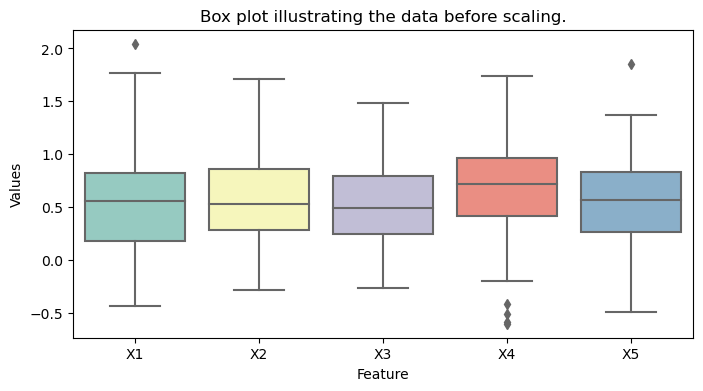

In [9]:
# Box plot of the data before scaling 

plt.figure(figsize = (8,4))
sns.boxplot(data=x, palette='Set3')
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box plot illustrating the data before scaling.')
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scale = pd.DataFrame(scaler.fit_transform(dataframe.drop('C', axis=1)), columns=dataframe.columns[:-1])


In [11]:
from sklearn.model_selection import train_test_split

x = df_scale.values
y = dataframe['C'].values
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x, y, test_size=0.25, random_state=42)


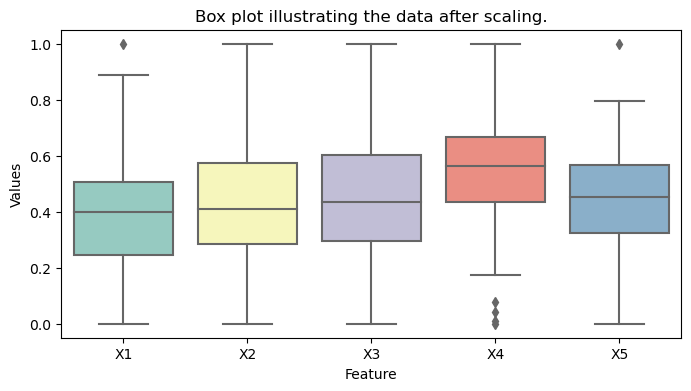

In [12]:
df_scale = pd.DataFrame(df_scale)
df_scale.columns = list(dataframe.columns[:-1])
plt.figure(figsize = (8,4))
sns.boxplot(data = df_scale, palette='Set3')
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box plot illustrating the data after scaling.')
plt.show()

## Train-Test Split

The dataset is divided into two segments: one is utilized for training the machine learning model, while the other is reserved for assessing the model's performance.
- Import the train_test_split function from the sklearn.model_selection module. This function facilitates the splitting of the dataset.
- The features (X) are extracted from the scaled DataFrame (df_scale).The target values (y) are taken from the original DataFrame (df) for the 'C' column, representing the protein location class.
- The test_size parameter determines the portion of the dataset allocated for the test split. In this instance, it is configured to 0.25, indicating that 25% of the data will be set aside for testing purposes.
- The random_state parameter ensures reproducibility. It sets a seed for the random number generator, so the split is the same across different runs.

In [13]:
from sklearn.model_selection import train_test_split

x = df_scale.values
y = dataframe['C'].values
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x, y, test_size=0.25, random_state=52)
# Check the shape of the resulting sets
print("Shape of X_train:", x_train_data.shape)
print("Shape of X_test:", x_test_data.shape)
print("Shape of y_train:", y_train_data.shape)
print("Shape of y_test:", y_test_data.shape)

Shape of X_train: (96, 5)
Shape of X_test: (33, 5)
Shape of y_train: (96,)
Shape of y_test: (33,)


## Naive Bayes Model
Naive Bayes represents a probabilistic classification algorithm grounded in Bayes' theorem, operating under the assumption of conditional independence among features to enhance computational efficiency. Through training, it calculates class probabilities and subsequently determines the most probable class for new instances. The Gaussian Naive Bayes variation specifically caters to continuous data characterized by normally distributed features.
- **Model Import**:
The Gaussian Naive Bayes model is brought into the code using the import statement: "from sklearn.naive_bayes import GaussianNB" from the scikit-learn library.
- **Model Instance Creation**:
An instance of the Gaussian Naive Bayes model is then created and named nb_model. This particular instance is intended for both training and generating predictions.
- **Model Training**:
During the model training, the fit method is called on the model instance, utilizing the training features (X_train_data) and their associated target values (y_train_data) as input parameters. Through this training process, the model gains an understanding of the statistical characteristics of the input features and their relationships with the target variable.

- **Prediction Generation**:
Post-training, the trained model (nb_model) is utilized to make predictions on the test features (X_test_data) by employing the predict method. The outcome, stored in nb_predictions, represents the anticipated protein locations based on the Naive Bayes model.

- **Gaussian Naive Bayes**:
The selection of the Gaussian Naive Bayes assumes a Gaussian (normal) distribution for the features, making it suitable for continuous-valued features.
- **Mathematically it is defined as**:
P(C∣X) = P(X)P(X∣C)/P(C)
- P(C∣X) represents the probability of the class C given the input featuresX, serving as the predicted probability of class membership.
- P(X∣C) denotes the likelihood, portraying the probability of observing the input features X given that the instance belongs to class 
- P(C) signifies the prior probability of class C, providing the initial probability estimate before considering the input features.
- P(X) is the probability of observing the input features X, often referred to as the evidence.
 



In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(x_train_data, y_train_data)

# Make predictions on the test set
nb_predictions = nb_model.predict(x_test_data)

# Evaluate the model
nb_accuracy = accuracy_score(y_test_data, nb_predictions)
nb_classification_report = classification_report(y_test_data, nb_predictions)
nb_confusion_matrix = confusion_matrix(y_test_data, nb_predictions)

# Print the results
print("Naive Bayes Accuracy:", nb_accuracy)
print("\nReport on Naive Bayes Classification:\n", nb_classification_report)
print("\nNaive Bayes Confusion Matrix:\n", nb_confusion_matrix)

Naive Bayes Accuracy: 0.6666666666666666

Report on Naive Bayes Classification:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        22
           1       0.50      0.36      0.42        11

    accuracy                           0.67        33
   macro avg       0.61      0.59      0.59        33
weighted avg       0.65      0.67      0.65        33


Naive Bayes Confusion Matrix:
 [[18  4]
 [ 7  4]]


## Logistic Regression Model
Logistic Regression, a binary classification algorithm, estimates the probability of an instance belonging to a particular class. By utilizing the logistic function, it converts linear combinations of input features into probabilities, proving effective in predicting binary outcomes and offering interpretable coefficients to assess feature importance.
- **Import Logistic Regression Class**: Import the LogisticRegression class from the scikit-learn library. Logistic Regression is a popular algorithm for binary classification.
- **Instantiate Logistic Regression Model**: Creates an instance of the Logistic Regression model named lr_model. This instance will be used to train the model and make predictions.
- **Train the model**: This line trains (fits) the Logistic Regression model using the training data. X_train_data represents the feature matrix, and y_train is the target variable (class labels). The model learns to map features to target classes.
- **Make Prediction**: After training, the model is used to make predictions on the test data (X_test_data). The predicted class labels are stored in the lr_predictions variable.

- **Mathematically expressing Logistic Regression**:y = 1/(1 + e^(wx +b))

The logistic regression equation is represented as y = 1 / (1 + e^(wx + b)), or more succinctly, y = sigmoid(wx + b). In this equation, x and y correspond to the features and target, respectively, while w represents the weight(s), and b is the bias term.

In [15]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model initialization 
lr_model = LogisticRegression()

# Training of the model
lr_model.fit(x_train_data, y_train_data)

# Test set predictions
lr_predictions = lr_model.predict(x_test_data)

# Evaluating model
lr_accuracy = accuracy_score(y_test_data, lr_predictions)
lr_classification_report = classification_report(y_test_data, lr_predictions)
lr_confusion_matrix = confusion_matrix(y_test_data, lr_predictions)

# Print the results
print(" Accuracy of Logistic Regression:", lr_accuracy)
print("\n Classification Report of Logistic Regression:\n", lr_classification_report)
print("\nConfusion Matrix of Logistic Regression :\n", lr_confusion_matrix)

 Accuracy of Logistic Regression: 0.7272727272727273

 Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82        22
           1       0.67      0.36      0.47        11

    accuracy                           0.73        33
   macro avg       0.70      0.64      0.64        33
weighted avg       0.72      0.73      0.70        33


Confusion Matrix of Logistic Regression :
 [[20  2]
 [ 7  4]]


## Validation
After fitting the data to both models, we can see that we have achieved around 66% and 72% accuracy for both models respectively. However, this is due to the fact that we have used only one set of data for training and one set for testing. The results would likely have been different if we had used a different data set for testing and training.

I am using 4-fold cross-validation (num_folds = 4) with a stratified approach for both the Naive Bayes and Logistic Regression models. The cross_val_score function returns an array of accuracy scores for each fold. These scores are then used to assess and compare the performance of the models.
Note that k-fold cross-validation is to evaluate the model design, not a particular training. Because re-trained the model of the same design with different training sets.

The standard process is outlined as follows:

- Randomly shuffle the dataset.
- Divide the dataset into k groups(in our case it is 4).
- For each distinct group that we have divided:
    - Designate the group as a holdout or test dataset
    - Consider the remaining groups as the training dataset.
    - Train a model on the training set and assess its performance on the test set.
    - Record the evaluation score and discard the model.
- Compile the evaluation results and use them to summarize the model's competency. 
Crucially, each data observation in the sample is grouped and stays in that group for the duration of the process. As a result, every sample gets the chance to train the model k-1 times and be included in the holdout set once.

In [16]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Set the number of folds
num_folds = 4

# Initialize Stratified K-Fold
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=52)

# Perform k-fold cross-validation for Naive Bayes
nb_cv_scores = cross_val_score(GaussianNB(), x, y, cv=stratified_kfold, scoring='accuracy')

# Perform k-fold cross-validation for Logistic Regression
lr_cv_scores = cross_val_score(LogisticRegression(), x, y, cv=stratified_kfold, scoring='accuracy')

# Print cross-validation results
print("Naive Bayes Cross-Validation Scores:", nb_cv_scores)
print("Mean Accuracy for Naive Bayes:", nb_cv_scores.mean())

print("\nLogistic Regression Cross-Validation Scores:", lr_cv_scores)
print("Mean Accuracy for Logistic Regression:", lr_cv_scores.mean())

Naive Bayes Cross-Validation Scores: [0.78787879 0.6875     0.78125    0.6875    ]
Mean Accuracy for Naive Bayes: 0.736032196969697

Logistic Regression Cross-Validation Scores: [0.75757576 0.75       0.78125    0.75      ]
Mean Accuracy for Logistic Regression: 0.7597064393939394


## Evaluating and comparing the performance of classification models
- The True Positive Rate (TPR) assesses the model's ability to correctly identify positive instances. It is determined by the ratio of true positives (correctly identified positive instances) to the sum of true positives and false negatives.

    -TPR = TP/(TP + FN)
- FPR is calculated as:
The False Positive Rate (FPR) is calculated as the proportion of negative instances that were inaccurately classified as positive. It is computed by dividing false positives (incorrectly identified positive instances) by the sum of false positives and true negatives.

    -FPR = FP / (FP + TN)

Where:

    - TP (True Positive): Instances correctly identified as positive.
    - FN (False Negative): Positive instances incorrectly classified as negative.
    - FP (False Positive): Negative instances incorrectly classified as positive.
    - TN (True Negative): Instances correctly identified as negative.

The AUC (Area Under the Curve) is a commonly employed metric for assessing the accuracy of a classification model. A higher AUC value indicates greater test accuracy. When the ROC (Receiver Operating Characteristic) curve is positioned closer to the upper-left corner of the graph, where sensitivity equals 1 and the false positive rate equals 0 (specificity equals 1), the accuracy is maximized. Therefore, an ideal ROC curve achieves an AUC value of 1.0.

By using ROC curves and AUC-ROC scores, we have gained insights into how well is our models discriminate between classes at various classification thresholds. This aids in model selection, threshold determination, and understanding the trade-offs between true positive and false positive rates.

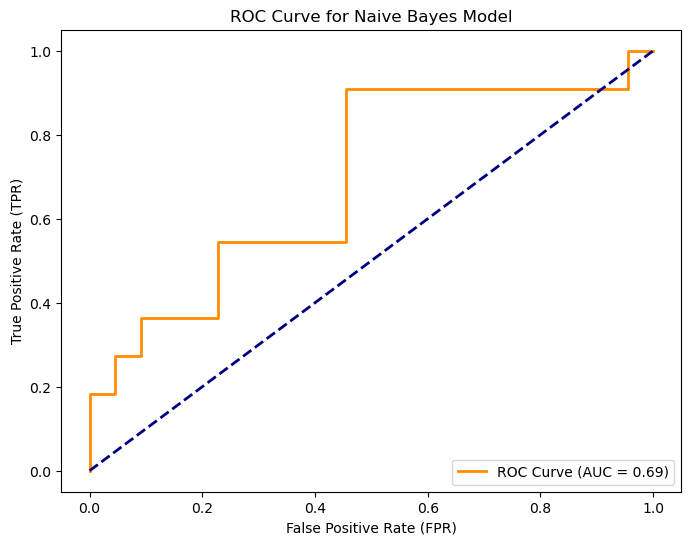

In [17]:
from sklearn.metrics import roc_curve, auc

#Obtain the predicted probabilities associated with the positive class (class 1)
nb_probs = nb_model.predict_proba(x_test_data)[:, 1]

# Calculating the curve of ROC 
fpr, tpr, thresholds = roc_curve(y_test_data, nb_probs)

# Calculating the AUC score
roc_auc = auc(fpr, tpr)

# Ploting the ROC curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes Model')
plt.legend(loc='lower right')
plt.show()

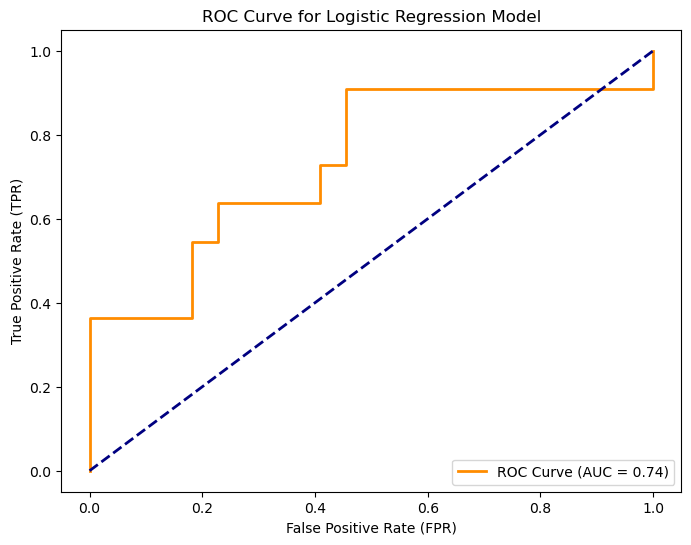

In [18]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (class 1)
lr_probs = lr_model.predict_proba(x_test_data)[:, 1]

# Calculate the ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_data, lr_probs)

# Calculate the AUC score
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot the ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()



## Analysis and Comparison:
I have trained my classification models, such as Naive Bayes and Logistic Regression, using a training dataset. To check the accuracy of the models, I have compared the predicted labels to the actual labels and calculated accuracy. Scikit-learn provides the **accuracy_score** function for this purpose.

By comparing training and testing accuracies, we have gained insights into how well our models generalize to new, unseen data. A large disparity between training and testing accuracies might indicate overfitting.

In [19]:
from sklearn.metrics import accuracy_score

def check_accuracy(model, x_train_data, y_train_data, x_test_data, y_test_data):

    # Training accuracy
    train_predictions = model.predict(x_train_data)
    train_accuracy = accuracy_score(y_train_data, train_predictions)

    # Testing accuracy
    test_predictions = model.predict(x_test_data)
    test_accuracy = accuracy_score(y_test_data, test_predictions)

    return train_accuracy, test_accuracy

# Example usage for Naive Bayes model
nb_train_accuracy, nb_test_accuracy = check_accuracy(nb_model, x_train_data, y_train_data, x_test_data, y_test_data)

# Example usage for Logistic Regression model
lr_train_accuracy, lr_test_accuracy = check_accuracy(lr_model, x_train_data, y_train_data, x_test_data, y_test_data)

# Print the results
print("Naive Bayes Training Accuracy:", nb_train_accuracy)
print("Naive Bayes Testing Accuracy:", nb_test_accuracy)
print("\nLogistic Regression Training Accuracy:", lr_train_accuracy)
print("Logistic Regression Testing Accuracy:", lr_test_accuracy)


Naive Bayes Training Accuracy: 0.8020833333333334
Naive Bayes Testing Accuracy: 0.6666666666666666

Logistic Regression Training Accuracy: 0.78125
Logistic Regression Testing Accuracy: 0.7272727272727273


## Model evaluation
Model evaluation is a way of looking at a machine learning model's performance and effectiveness. It uses a variety of metrics and techniques to determine how well the model learns from new, non-observed data. The aim of model evaluation is to understand the strengths and weaknesses of the model, identify potential problems, and make decisions about how to deploy the model.

Performance metrics are quantitative measures used to assess the effectiveness and accuracy of a machine learning model.
- Accuracy: Measures the proportion of correct predictions.
- Precision: Ratio of true positive predictions to the total predicted positives.
- Recall (Sensitivity): Ratio of true positive predictions to the actual positives in the dataset.
- F1 Score: Harmonic mean of precision and recall, providing a balanced measure.

For the initial split, we’ll calculate the metrics. We’ve already calculated the metrics for cross validation, but we’ll visualise that later.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true_data, y_pred):

    accuracy = accuracy_score(y_true_data, y_pred)
    precision = precision_score(y_true_data, y_pred)
    recall = recall_score(y_true_data, y_pred)
    f1 = f1_score(y_true_data, y_pred)

    return accuracy, precision, recall, f1

# Example usage for Naive Bayes model
nb_accuracy, nb_precision, nb_recall, nb_f1 = calculate_metrics(y_test_data, nb_predictions)

# Example usage for Logistic Regression model
lr_accuracy, lr_precision, lr_recall, lr_f1 = calculate_metrics(y_test_data, lr_predictions)

# Print the results
print("Naive Bayes Metrics:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)

print("\nLogistic Regression Metrics:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)


Naive Bayes Metrics:
Accuracy: 0.6666666666666666
Precision: 0.5
Recall: 0.36363636363636365
F1 Score: 0.4210526315789474

Logistic Regression Metrics:
Accuracy: 0.7272727272727273
Precision: 0.6666666666666666
Recall: 0.36363636363636365
F1 Score: 0.4705882352941177


To present it better here is the visual reprentaion of the same using initial split

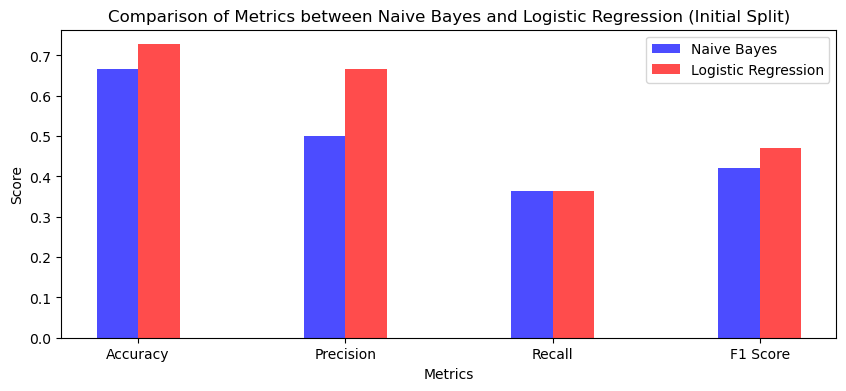

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Naive Bayes
nb_metrics = [nb_accuracy, nb_precision, nb_recall, nb_f1]

# Metrics for Logistic Regression
lr_metrics = [lr_accuracy, lr_precision, lr_recall, lr_f1]

# Metric labels
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Set up the bar chart
bar_width = 0.2
index = np.arange(len(metric_labels))

plt.figure(figsize=(10, 4))

# Bar chart for Naive Bayes
plt.bar(index, nb_metrics, bar_width, label='Naive Bayes', color='b', alpha=0.7)

# Bar chart for Logistic Regression
plt.bar(index + bar_width, lr_metrics, bar_width, label='Logistic Regression', color='r', alpha=0.7)

# Labeling
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Metrics between Naive Bayes and Logistic Regression (Initial Split)')
plt.xticks(index + bar_width / 2, metric_labels)
plt.legend()

# Show the plot
plt.show()


## K fold

Model evaluation using k-fold cross-validation is a technique to assess the performance of a machine learning model by splitting the dataset into k subsets (folds). 

In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Function to calculate metrics using cross-validation
def cross_val_metrics(model, x, y, cv):

    accuracy = cross_val_score(model, x, y, cv=cv, scoring='accuracy')
    precision = cross_val_score(model, x, y, cv=cv, scoring='precision')
    recall = cross_val_score(model, x, y, cv=cv, scoring='recall')
    f1 = cross_val_score(model, x, y, cv=cv, scoring='f1')

    metrics = {
        'accuracy': accuracy.mean(),
        'precision': precision.mean(),
        'recall': recall.mean(),
        'f1 score': f1.mean()
    }

    return metrics

# Create 4-fold stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Calculate metrics for Naive Bayes using cross-validation
nb_cross_val_metrics = cross_val_metrics(nb_model, x, y, cv=stratified_cv)

# Print the results for Naive Bayes
print("Naive Bayes Metrics (4-fold cross-validation):")
print("Accuracy:", nb_cross_val_metrics['accuracy'])
print("Precision:", nb_cross_val_metrics['precision'])
print("Recall:", nb_cross_val_metrics['recall'])
print("F1 Score:", nb_cross_val_metrics['f1 score'])

# Calculate metrics for Logistic Regression using cross-validation
lr_cross_val_metrics = cross_val_metrics(lr_model, x, y, cv=stratified_cv)

# Print the results for Logistic Regression
print("\nLogistic Regression Metrics (4-fold cross-validation):")
print("Accuracy:", lr_cross_val_metrics['accuracy'])
print("Precision:", lr_cross_val_metrics['precision'])
print("Recall:", lr_cross_val_metrics['recall'])
print("F1 Score:", lr_cross_val_metrics['f1 score'])


Naive Bayes Metrics (4-fold cross-validation):
Accuracy: 0.7357954545454546
Precision: 0.7252525252525253
Recall: 0.576923076923077
F1 Score: 0.6407312252964427

Logistic Regression Metrics (4-fold cross-validation):
Accuracy: 0.7597064393939394
Precision: 0.8616071428571428
Recall: 0.4807692307692307
F1 Score: 0.6166666666666667


To present it better here is the visual reprentaion of the same using K- Fold

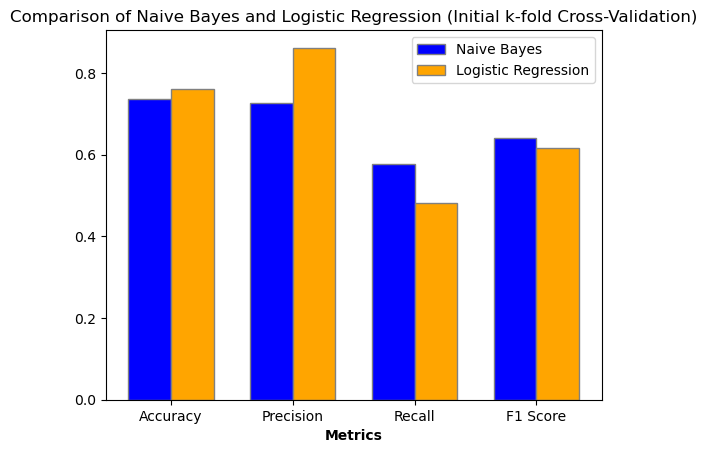

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and model names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
naive_bayes_values = [np.mean(nb_cross_val_metrics['accuracy']),
                      np.mean(nb_cross_val_metrics['precision']),
                      np.mean(nb_cross_val_metrics['recall']),
                      np.mean(nb_cross_val_metrics['f1 score'])]

logistic_regression_values = [np.mean(lr_cross_val_metrics['accuracy']),
                              np.mean(lr_cross_val_metrics['precision']),
                              np.mean(lr_cross_val_metrics['recall']),
                              np.mean(lr_cross_val_metrics['f1 score'])]

# Set the width of the bars
bar_width = 0.35

# Set the positions of bars on X-axis
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]

# Create bar graph
plt.bar(r1, naive_bayes_values, color='blue', width=bar_width, edgecolor='grey', label='Naive Bayes')
plt.bar(r2, logistic_regression_values, color='orange', width=bar_width, edgecolor='grey', label='Logistic Regression')

# Add labels
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(metrics))], metrics)
plt.title('Comparison of Naive Bayes and Logistic Regression (Initial k-fold Cross-Validation)')
plt.legend()

# Show the plot
plt.show()


## Naive Bayes Assumption:

The term "naive" in Naive Bayes stems from assuming that features are conditionally independent given the class. This means that the existence or non-existence of a specific feature is considered unrelated to the existence or non-existence of any other feature.


## Conclusion 
In this project, we aimed to develop and evaluate machine learning models to predict the location of proteins in the bacteria Escherichia coli based on their features. The dataset provided information about protein properties and their corresponding locations in the cell. In conclusion, this project successfully developed and evaluated predictive models for protein localization using Naïve Bayes and Logistic Regression. The comparison of models revealed insights into their respective strengths and weaknesses, aiding in the selection of an appropriate model for the given task. Overall we can say that Our Logistic Regression model has performed better than Naive bayes.Area under the curve iof logistic is better than naive.